In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_recall_curve,recall_score,precision_score,auc,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler




In [20]:
app = pd.read_csv('../input/datadata/dataset.csv')
app.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Unnamed: 7,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,KHILGAON,NaN,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,KHILGAON,NaN,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,URDU ROAD,NaN,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,AHMED NAGAR,NaN,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,KHILGAON,NaN,1,1,0,0,0,No


In [21]:
app.drop('Unnamed: 7', axis = 1, inplace = True)

In [22]:
app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,KHILGAON,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,KHILGAON,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,URDU ROAD,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,AHMED NAGAR,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,KHILGAON,1,1,0,0,0,No


In [23]:
print("Number of Patients: %d" % len(app['PatientId'].unique()))
print("Number of Appointments: %d" % app['PatientId'].count())
print("Attendance mean %f" % (app['PatientId'].count()/ len(app['PatientId'].unique())))
print ("Max of attendance group by patientsnes es: %d" % app.groupby('PatientId')[['AppointmentID']].count().sort_values('AppointmentID',ascending= False).max())

Number of Patients: 61744
Number of Appointments: 110527
Attendance mean 1.790085
Max of attendance group by patientsnes es: 88


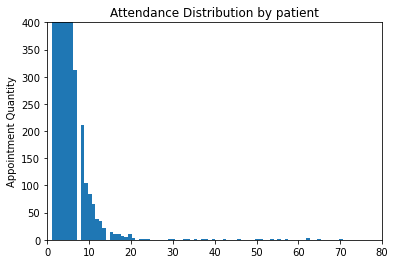

In [24]:
fig, ax = plt.subplots()
a = app.groupby('PatientId')[['AppointmentID']].count()
ax.hist(a['AppointmentID'].tolist(),bins=100)
ax.set(xlim=[0,80], ylabel='Appointment Quantity',
       title='Attendance Distribution by patient')
plt.ylim((0,400))
plt.show()

In [25]:
app['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [26]:
app.rename(columns={'No-show': 'Show'},inplace=True)

In [27]:
app['Show'] = app.Show.transform(lambda x: 1 if (x == 'No') else 0)

In [28]:
app.count()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
Show              110527
dtype: int64

In [29]:
app.describe()

,PatientId,AppointmentID,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [30]:
app = app[app.Age>0]

In [31]:
app_day = pd.to_datetime(app.AppointmentDay)
sch_day =  pd.to_datetime(app.ScheduledDay)
wait = app_day -sch_day
app['waiting'] = pd.DataFrame(wait)
app = app[app.waiting >= '0']


In [32]:
app['weekday'] = app_day.dt.weekday

In [33]:
app['waiting'] =(app.waiting/np.timedelta64(1, 'D')).astype(int)

In [34]:
app['cant_asistencias'] = app.groupby('PatientId')[['Show']].transform(sum)
app['cant_turnos'] = app.groupby('PatientId')[['Show']].transform('count')

app['prom_asistencia'] = app.cant_asistencias / app.cant_turnos

In [35]:
app.groupby('PatientId')[['Show']].apply(sum).count()

Show    43953
dtype: int64

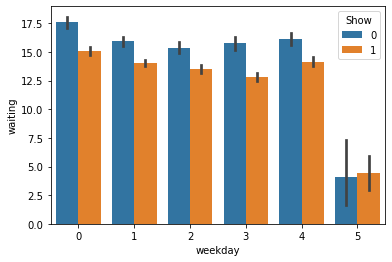

In [36]:
sns.barplot(x ='weekday',y='waiting',hue='Show', data=app)
plt.show()

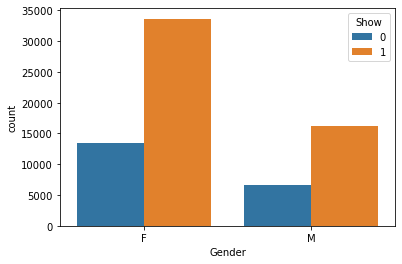

In [37]:
sns.countplot(x='Gender',hue='Show', data=app)
plt.show()

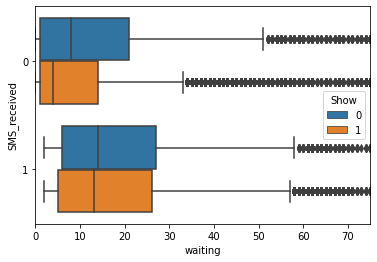

In [38]:
sns.boxplot(x="waiting", y="SMS_received", hue="Show", data=app,orient='h')
plt.xlim(0,75)
plt.show()

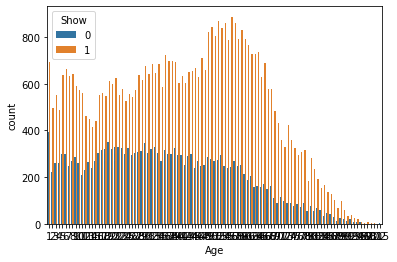

In [39]:

sns.countplot(x='Age',hue='Show', data=app)

plt.show()

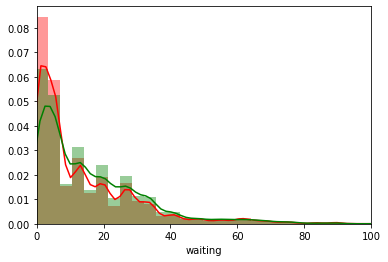

In [40]:
sns.distplot(app.waiting[app.Show == 1],color='Red')
sns.distplot(app.waiting[app.Show == 0],color='Green')

plt.xlim(0,100)


plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


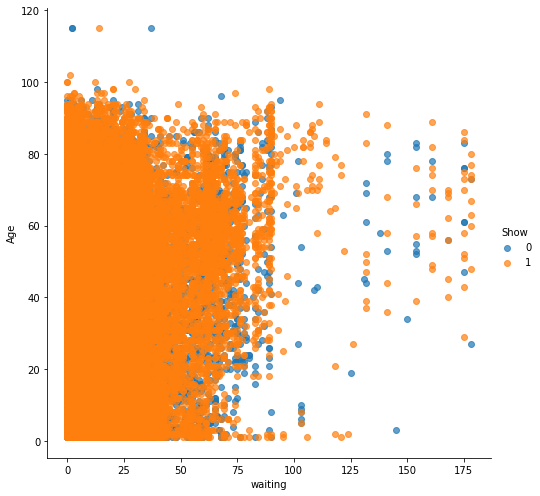

In [41]:
g = sns.FacetGrid(app , hue='Show',size=7)
g.map(plt.scatter,'waiting','Age', alpha = .7)
g.add_legend();
plt.show()

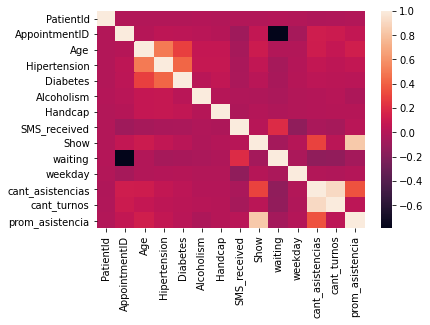

In [42]:
sns.heatmap(app.corr())
plt.show()

In [43]:
app.groupby('Show').count()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,waiting,weekday,cant_asistencias,cant_turnos,prom_asistencia
Show,,,,,,,,,,,,,,,,,
0,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934
1,49894,49894,49894,49894,49894,49894,49894,49894,49894,49894,49894,49894,49894,49894,49894,49894,49894


In [44]:
app['Gender'] = pd.get_dummies(app.Gender,drop_first=True)

In [45]:
app = app.sort_values('AppointmentID', ascending=True)

In [46]:
kf = KFold(n_splits=5, shuffle=True)

X = app[['SMS_received','waiting','Age','Gender','cant_turnos']]
y = app.Show
a
X = StandardScaler().fit_transform(X) 

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = app.loc[:50000,['SMS_received','waiting','Age','Gender','cant_turnos','prom_asistencia']]

X_test= app.loc[50001:,['SMS_received','waiting','Age','Gender','cant_turnos','prom_asistencia']]

y_train= app.loc[:50000,'Show']

y_test= app.loc[50001:,'Show']

In [47]:
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(30495, 6) (30495,) (64453, 6) (64453,)


# Logistic Regression:

In [48]:
lr = LogisticRegression(C=1e10,class_weight='balanced')

lr.fit(X_train,y_train)

LogisticRegression(C=10000000000.0, class_weight='balanced')

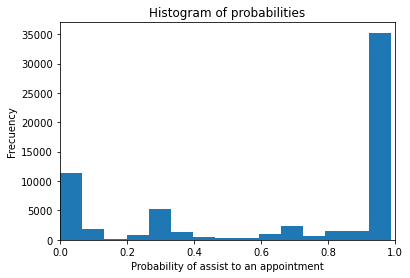

In [49]:
lr_predicts = lr.predict(X_test)
lr_log_predicts = lr.predict_proba(X_test)

preds_left = lr_log_predicts[:,1]
# 15 bins
plt.hist(preds_left, bins=15)

# x-axis de 0 a 1
plt.xlim(0,1)
plt.title('Histogram of probabilities')
plt.xlabel('Probability of assist to an appointment')
plt.ylabel('Frecuency')
plt.show()


In [50]:
y_pred = (preds_left > 0.6)
accuracy_score(y_test,y_pred)

0.8856686267512761

In [51]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[16418,  1843],
       [ 5526, 40666]])

In [52]:
print('Amount of correct positives classified: ',recall_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))



print (classification_report(y_test,y_pred))

Amount of correct positives classified:  0.8803688950467613
Precision:  0.9566444752875861
F1 Score:  0.9169231463004925
              precision    recall  f1-score   support

           0       0.75      0.90      0.82     18261
           1       0.96      0.88      0.92     46192

    accuracy                           0.89     64453
   macro avg       0.85      0.89      0.87     64453
weighted avg       0.90      0.89      0.89     64453



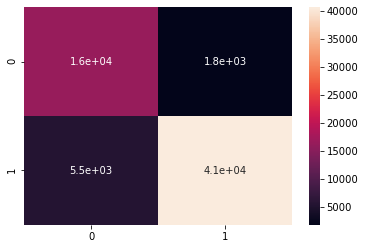

In [53]:
sns.heatmap(cm,annot=True)
plt.show()

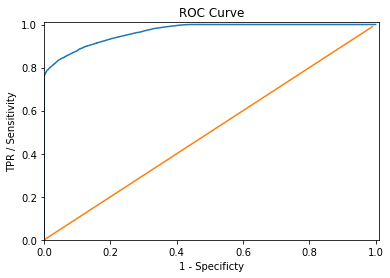

In [54]:
fpr,tpr,ths = roc_curve(y_test, lr_log_predicts[:,1])
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

# SVM:

In [55]:
from sklearn import svm

clf = svm.SVC(probability=True)

clf.fit(X_train,y_train)

SVC(probability=True)

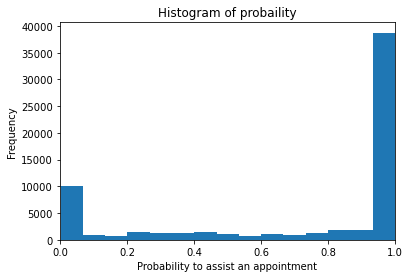

In [58]:
svm_predicts = clf.predict(X_test)
svm_log_predicts = clf.predict_proba(X_test)

preds_left = svm_log_predicts[:,1]
# 15 bins
plt.hist(preds_left, bins=15)

# x-axis de 0 a 1
plt.xlim(0,1)
plt.title('Histogram of probaility')
plt.xlabel('Probability to assist an appointment')
plt.ylabel('Frequency')
plt.show()

In [59]:
y_pred = (preds_left > 0.85)
accuracy_score(y_test,y_pred)

0.877771399314229

In [60]:
accuracy_score(y_test,y_pred)

0.877771399314229

In [61]:
print('Amoun of correct positives classified: ',recall_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))



print (classification_report(y_test,y_pred))

Amoun of correct positives classified:  0.8571614132317285
Precision:  0.9686842491559426
F1 Score:  0.9095169181999863
              precision    recall  f1-score   support

           0       0.72      0.93      0.81     18261
           1       0.97      0.86      0.91     46192

    accuracy                           0.88     64453
   macro avg       0.84      0.89      0.86     64453
weighted avg       0.90      0.88      0.88     64453



In [62]:
cm_svm = confusion_matrix(y_test,y_pred)
cm_svm

array([[16981,  1280],
       [ 6598, 39594]])

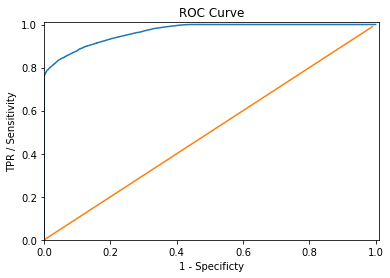

In [63]:
fpr,tpr,ths = roc_curve(y_test, lr_log_predicts[:,1])
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

# K-Nearest Neigbor

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [65]:
k_range = list(range(1, 31))
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=k_range)
grid = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30]},
                   scoring='accuracy')

In [66]:
grid.best_params_['n_neighbors']

8

In [67]:
best_model = KNeighborsClassifier(n_neighbors= grid.best_params_['n_neighbors'])
best_model.fit(X_train,y_train)
KNN_predicts = best_model.predict(X_test)

In [68]:
accuracy_score(y_test,KNN_predicts)

0.8358804089801871

In [69]:
cm_KNN = confusion_matrix(y_test,KNN_predicts)
cm_KNN

array([[10585,  7676],
       [ 2902, 43290]])

In [70]:
print(classification_report(y_test,KNN_predicts))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67     18261
           1       0.85      0.94      0.89     46192

    accuracy                           0.84     64453
   macro avg       0.82      0.76      0.78     64453
weighted avg       0.83      0.84      0.83     64453



# Gaussian Naive Bayes:

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

In [72]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

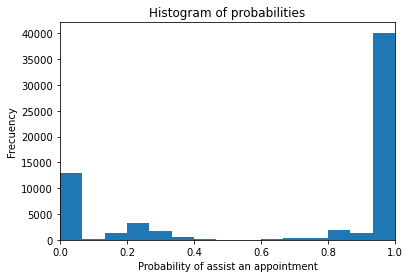

In [73]:
nb_predicts = nb.predict(X_test)
nb_log_predicts = nb.predict_proba(X_test)

preds_left = nb_log_predicts[:,1]
# 15 bins
plt.hist(preds_left, bins=15)

# x-axis de 0 a 1
plt.xlim(0,1)
plt.title('Histogram of probabilities')
plt.xlabel('Probability of assist an appointment')
plt.ylabel('Frecuency')
plt.show()

In [74]:
accuracy_score(y_test,y_pred)

0.877771399314229

[[16981  1280]
 [ 6598 39594]]


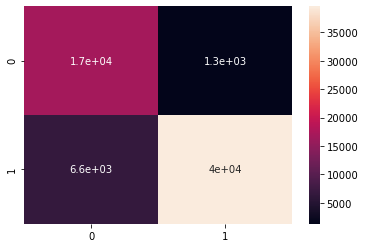

In [75]:
cm_nb = confusion_matrix(y_test,y_pred)
print(cm_nb)
sns.heatmap(cm_nb,annot=True)

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81     18261
           1       0.97      0.86      0.91     46192

    accuracy                           0.88     64453
   macro avg       0.84      0.89      0.86     64453
weighted avg       0.90      0.88      0.88     64453



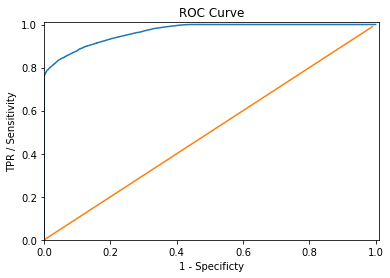

In [77]:
fpr,tpr,ths = roc_curve(y_test, lr_log_predicts[:,1])
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

# Random Forest 

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
n_params = { 'n_estimators':[3,5,10,50],
              'criterion':['gini','entropy'],
              'max_depth': [None,3,5],
               'min_samples_split':[2,5],
               'class_weight':['balanced',None]}

gsrf = GridSearchCV(RandomForestClassifier(),n_params,cv= KFold(n_splits=3,shuffle=True))

gsrf.fit(X_train,y_train)

rf_predicts = gsrf.predict(X_test)

print (classification_report(y_test,rf_predicts))
print(confusion_matrix(y_test,rf_predicts))
print (accuracy_score(y_test,rf_predicts))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     18261
           1       0.93      0.92      0.92     46192

    accuracy                           0.89     64453
   macro avg       0.87      0.87      0.87     64453
weighted avg       0.89      0.89      0.89     64453

[[15060  3201]
 [ 3703 42489]]
0.8928831861976945
